In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
test_data = pd.read_parquet('test_pred.parquet')

In [3]:
X_train = pd.read_parquet('X_train_new_feat.parquet')
X_test = pd.read_parquet('X_test_new_feat.parquet')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

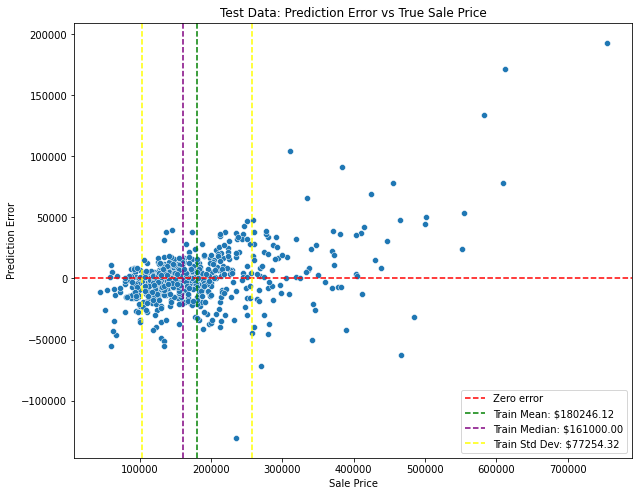

In [4]:
# Add summary statistics (mean, median, and standard deviation)
mean_price = y_train['sale_price'].mean()
median_price = y_train['sale_price'].median()
std_price = y_train['sale_price'].std()

plt.figure(figsize=(10, 8))
sns.scatterplot(test_data, x='sale_price', y='error')
plt.axhline(0, color='red', linestyle='--', label='Zero error')
plt.axvline(mean_price, color='green', linestyle='--', label=f'Train Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='purple', linestyle='--', label=f'Train Median: ${median_price:.2f}')
plt.axvline(mean_price + std_price, color='yellow', linestyle='--', label=f'Train Std Dev: ${std_price:.2f}')
plt.axvline(mean_price - std_price, color='yellow', linestyle='--')
# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Sale Price')
plt.ylabel('Prediction Error')
plt.title('Test Data: Prediction Error vs True Sale Price')

# Show the plot
plt.show()

- This clearly shows that model is making less errors when predicting Sale Price on cheaper properties.
- This could be beacause the distribution of sale price in training data

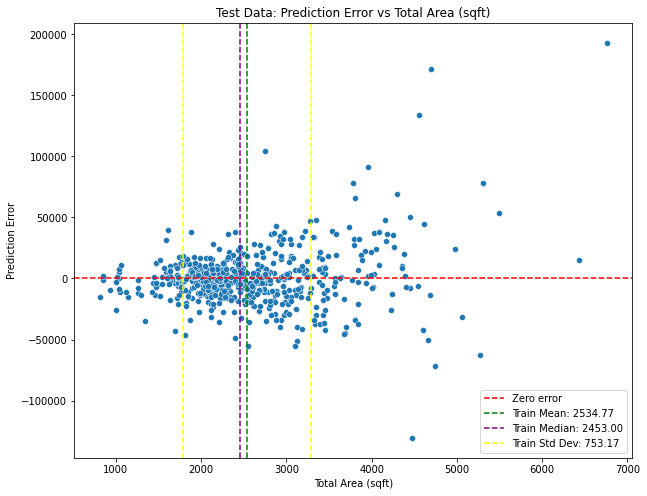

In [5]:
# Add summary statistics (mean, median, and standard deviation)
mean_price = X_train['totalSqFeet'].mean()
median_price = X_train['totalSqFeet'].median()
std_price = X_train['totalSqFeet'].std()

plt.figure(figsize=(10, 8))
sns.scatterplot(test_data, x='totalSqFeet', y='error')
plt.axhline(0, color='red', linestyle='--', label='Zero error')
plt.axvline(mean_price, color='green', linestyle='--', label=f'Train Mean: {mean_price:.2f}')
plt.axvline(median_price, color='purple', linestyle='--', label=f'Train Median: {median_price:.2f}')
plt.axvline(mean_price + std_price, color='yellow', linestyle='--', label=f'Train Std Dev: {std_price:.2f}')
plt.axvline(mean_price - std_price, color='yellow', linestyle='--')
# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Total Area (sqft)')
plt.ylabel('Prediction Error')
plt.title('Test Data: Prediction Error vs Total Area (sqft)')

# Show the plot
plt.show()

- Similar to Sale Price, model is making less error on smaller properties.

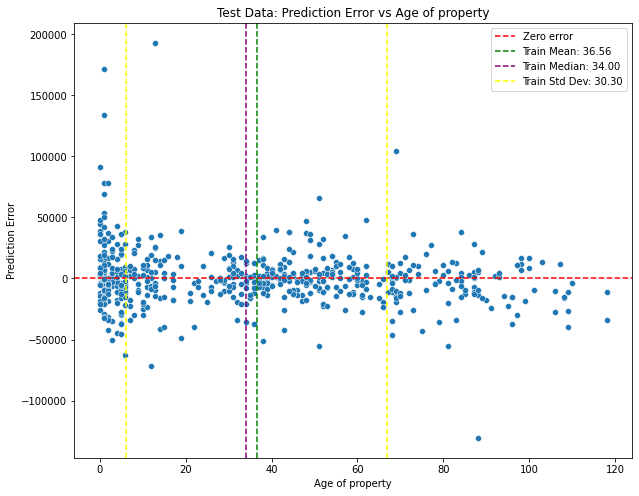

In [6]:
# Add summary statistics (mean, median, and standard deviation)
mean_price = X_train['houseAge'].mean()
median_price = X_train['houseAge'].median()
std_price = X_train['houseAge'].std()

plt.figure(figsize=(10, 8))
sns.scatterplot(test_data, x='houseAge', y='error')
plt.axhline(0, color='red', linestyle='--', label='Zero error')
plt.axvline(mean_price, color='green', linestyle='--', label=f'Train Mean: {mean_price:.2f}')
plt.axvline(median_price, color='purple', linestyle='--', label=f'Train Median: {median_price:.2f}')
plt.axvline(mean_price + std_price, color='yellow', linestyle='--', label=f'Train Std Dev: {std_price:.2f}')
plt.axvline(mean_price - std_price, color='yellow', linestyle='--')
# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Age of property')
plt.ylabel('Prediction Error')
plt.title('Test Data: Prediction Error vs Age of property')

# Show the plot
plt.show()

- But no clear pattern with respect to Age of property.

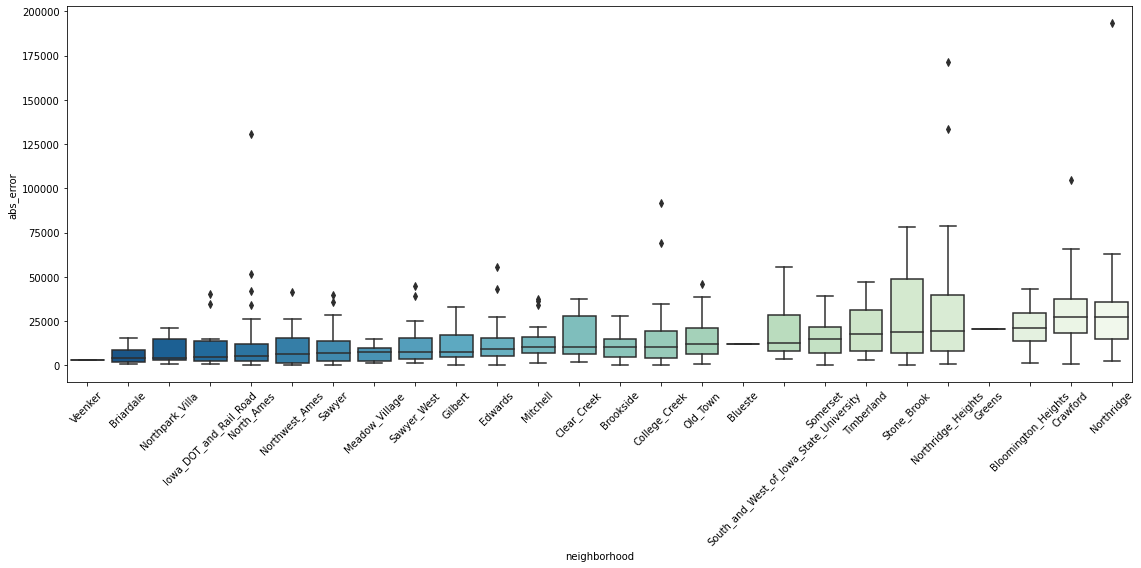

In [7]:
plt.figure(figsize=(16, 8))
# Descending order of levels sorted by mean error
featOrder = test_data.groupby(
    ['neighborhood']).median().abs_error.sort_values(ascending=True).index
sns.boxplot(test_data, x='neighborhood', y='abs_error', order=featOrder, palette='GnBu_r',)
_ = plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Model performance is not same in all neighborhood.

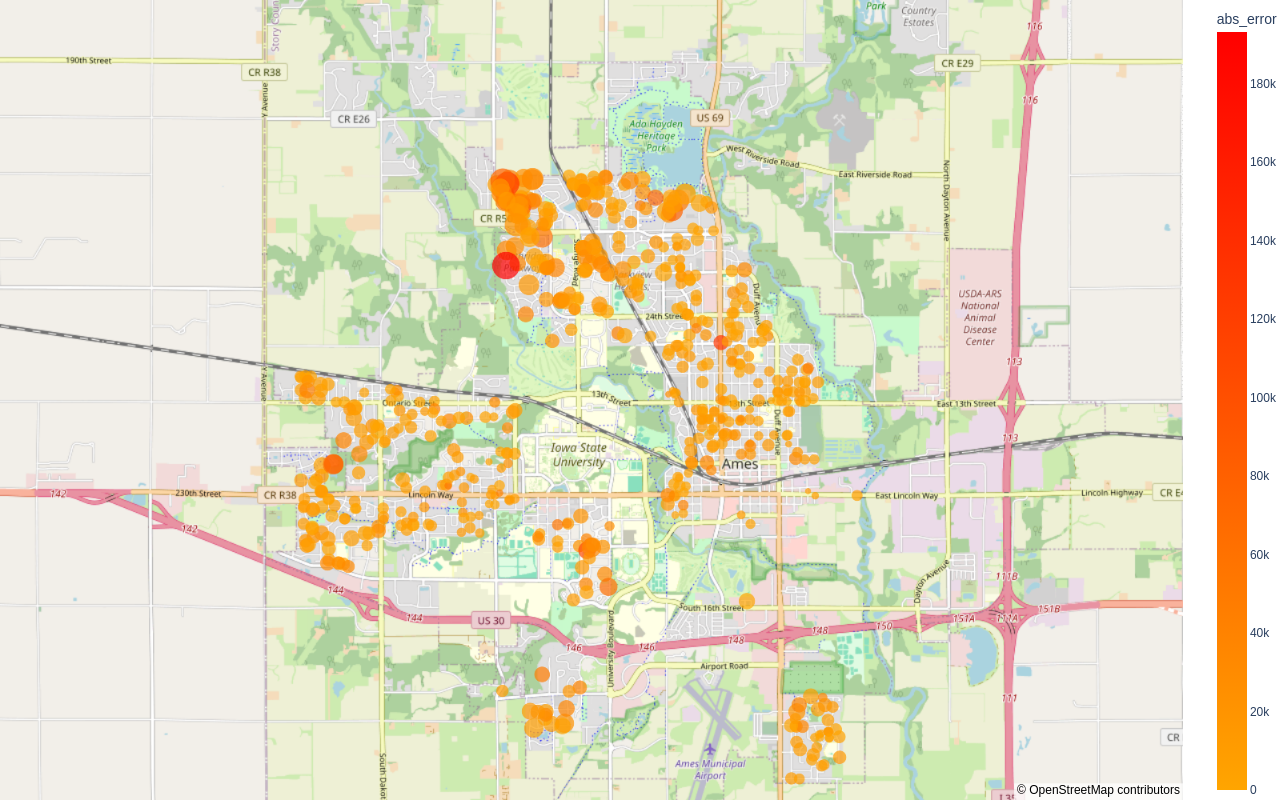

In [8]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(test_data, 
                        lat="latitude", 
                        lon="longitude", 
                        color="abs_error",
                        color_continuous_scale=color_scale,
                        size="sale_price",
                        zoom=12, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()